In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from PIL import Image

In [2]:
# train_data = np.array([np.array(Image.open('Train/' + image_jpg)) for image_jpg in training_descriptions['filename']])
# test_data = np.array([np.array(Image.open('Test/' + image_jpg)) for image_jpg in testing_descriptions['filename']])
# train_data, test_data = train_data / 255, test_data / 255

In [3]:
bloodcells = os.listdir("bloodcells_dataset")
bloodcells.remove('.DS_Store')
bloodcells.remove('All_Images')

In [4]:
images = os.listdir('bloodcells_dataset/' + bloodcells[0])
df = pd.DataFrame(data = {'images': images, 'type': bloodcells[0], 'height': np.nan, 'width': np.nan})

for i in range(1, len(bloodcells)):

    images = os.listdir('bloodcells_dataset/' + bloodcells[i])
    images_df = pd.DataFrame(data = {'images': images, 'type': bloodcells[i], 'height': np.nan, 'width': np.nan})
    df = pd.concat([df, images_df])

df.index = range(len(df.index))

df

,images,type,height,width
0,BA_689200.jpg,basophil,NaN,NaN
1,BA_883452.jpg,basophil,NaN,NaN
2,BA_382161.jpg,basophil,NaN,NaN
3,BA_175579.jpg,basophil,NaN,NaN
4,BA_775722.jpg,basophil,NaN,NaN
...,...,...,...,...
17087,PLATELET_495918.jpg,platelet,NaN,NaN
17088,PLATELET_897238.jpg,platelet,NaN,NaN
17089,PLATELET_750430.jpg,platelet,NaN,NaN
17090,PLATELET_810431.jpg,platelet,NaN,NaN


In [10]:
for i in range(len(df)):

    image = Image.open('bloodcells_dataset/All_Images/' + df['images'][i])

    width, height = image.size

    df.at[i, 'height'] = height

    df.at[i, 'width'] = width

convert_dict = {'height': int, 'width': int}

df = df.astype(convert_dict)

df

,images,type,height,width
0,BA_689200.jpg,basophil,363,360
1,BA_883452.jpg,basophil,363,360
2,BA_382161.jpg,basophil,369,366
3,BA_175579.jpg,basophil,363,360
4,BA_775722.jpg,basophil,363,360
...,...,...,...,...
17087,PLATELET_495918.jpg,platelet,363,360
17088,PLATELET_897238.jpg,platelet,363,360
17089,PLATELET_750430.jpg,platelet,363,360
17090,PLATELET_810431.jpg,platelet,363,360


In [14]:
df[(df['height'] == 363) & (df['width'] == 360)]

# do a value counts

,images,type,height,width
0,BA_689200.jpg,basophil,363,360
1,BA_883452.jpg,basophil,363,360
3,BA_175579.jpg,basophil,363,360
4,BA_775722.jpg,basophil,363,360
5,BA_209608.jpg,basophil,363,360
...,...,...,...,...
17087,PLATELET_495918.jpg,platelet,363,360
17088,PLATELET_897238.jpg,platelet,363,360
17089,PLATELET_750430.jpg,platelet,363,360
17090,PLATELET_810431.jpg,platelet,363,360


The dimensions of the image are: 363 x 360


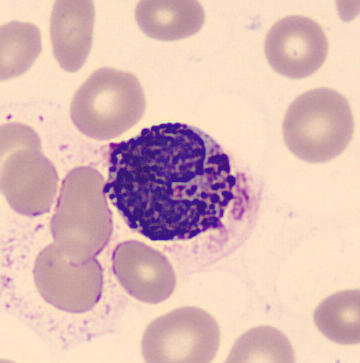

In [29]:
test = Image.open('bloodcells_dataset/All_Images/' + df['images'][0])

width, height = test.size

print("The dimensions of the image are:", height, 'x', width)

test

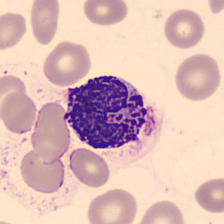

In [33]:
test.resize((224, 224))

In [18]:
# test1 = df[df['type'] == 'basophil']
# test2 = df[df['type'] == 'platelet']

test = df[(df['height'] == 363) & (df['width'] == 360)]

# test = test.head(10000) # do in batches of 5000

x = np.array([np.array(Image.open('bloodcells_dataset/All_Images/' + image)) for image in test['images']])

x.shape


(16639, 363, 360, 3)

In [8]:
# check = np.array(Image.open('bloodcells_dataset/All_Images/' + df[['images'][0]))

# check.shape

df['images']

0              BA_689200.jpg
1              BA_883452.jpg
2              BA_382161.jpg
3              BA_175579.jpg
4              BA_775722.jpg
                ...         
17087    PLATELET_495918.jpg
17088    PLATELET_897238.jpg
17089    PLATELET_750430.jpg
17090    PLATELET_810431.jpg
17091    PLATELET_499850.jpg
Name: images, Length: 17092, dtype: object